In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

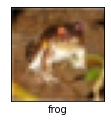

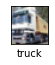

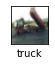

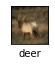

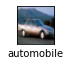

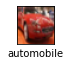

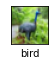

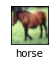

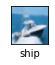

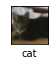

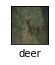

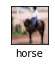

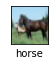

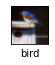

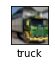

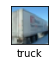

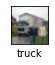

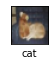

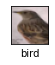

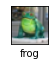

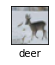

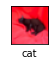

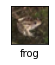

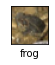

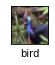

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

In [6]:
# CREATING THE CNN MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 128s 81ms/step - loss: 1.5347 - accuracy: 0.4395 - val_loss: 1.2589 - val_accuracy: 0.5392
Epoch 2/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.1587 - accuracy: 0.5880 - val_loss: 1.1365 - val_accuracy: 0.5940
Epoch 3/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.0080 - accuracy: 0.6459 - val_loss: 1.0287 - val_accuracy: 0.6425
Epoch 4/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.9142 - accuracy: 0.6794 - val_loss: 0.9711 - val_accuracy: 0.6632
Epoch 5/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.8474 - accuracy: 0.7043 - val_loss: 0.8963 - val_accuracy: 0.6870
Epoch 6/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.7947 - accuracy: 0.7226 - val_loss: 0.8834 - val_accuracy: 0.6953
Epoch 7/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.7457 - accuracy: 0.7389 - val_loss: 0

313/313 - 7s - loss: 0.8386 - accuracy: 0.7180 - 7s/epoch - 23ms/step


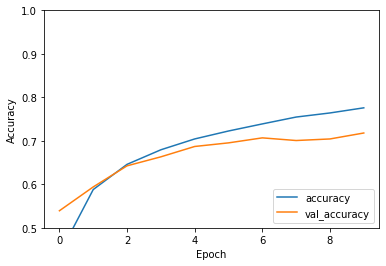

In [12]:
# TEST THE MODEL
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [14]:
print('Accuracy: ', test_acc)

Accuracy:  0.7179999947547913


In [16]:
# MAKING ANOTHER MODEL
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 128)       

In [21]:
# Compiling the model2
model2.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 196s 124ms/step - loss: 1.4465 - accuracy: 0.4736 - val_loss: 1.2001 - val_accuracy: 0.5719
Epoch 2/10
1563/1563 [==============================] - 189s 121ms/step - loss: 1.0065 - accuracy: 0.6479 - val_loss: 0.9535 - val_accuracy: 0.6654
Epoch 3/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.8344 - accuracy: 0.7103 - val_loss: 0.9109 - val_accuracy: 0.6831
Epoch 4/10
1563/1563 [==============================] - 190s 122ms/step - loss: 0.7262 - accuracy: 0.7465 - val_loss: 0.8371 - val_accuracy: 0.7154
Epoch 5/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.6390 - accuracy: 0.7762 - val_loss: 0.7632 - val_accuracy: 0.7374
Epoch 6/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.5615 - accuracy: 0.8026 - val_loss: 0.8167 - val_accuracy: 0.7289
Epoch 7/10
1563/1563 [==============================] - 190s 121ms/step - loss: 0.4974 - accuracy: 0.8258 - val_

313/313 - 11s - loss: 0.9458 - accuracy: 0.7314 - 11s/epoch - 36ms/step


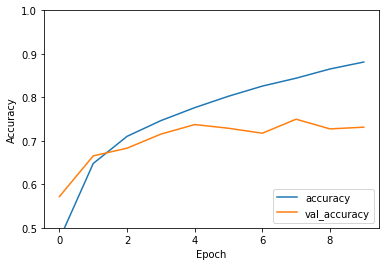

In [22]:
# Test Model 2
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)